<span style='color:Green; font-weight: bold;'>Regression</span>

1- Load the libraries:


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


2-Load the Dataset:

In [3]:
Housing_dataframe = pd.read_csv('California_Houses.csv') # load data from file

3-Seperate The features and the target:

In [4]:
X_housing = Housing_dataframe.drop('Median_House_Value', axis=1) # drop the target column
y_housing = Housing_dataframe['Median_House_Value']# set the target column
print(X_housing.head())
print(y_housing.head())

   Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  Households  \
0         8.3252          41        880           129         322         126   
1         8.3014          21       7099          1106        2401        1138   
2         7.2574          52       1467           190         496         177   
3         5.6431          52       1274           235         558         219   
4         3.8462          52       1627           280         565         259   

   Latitude  Longitude  Distance_to_coast  Distance_to_LA  \
0     37.88    -122.23        9263.040773   556529.158342   
1     37.86    -122.22       10225.733072   554279.850069   
2     37.85    -122.24        8259.085109   554610.717069   
3     37.85    -122.25        7768.086571   555194.266086   
4     37.85    -122.25        7768.086571   555194.266086   

   Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  
0         735501.806984         67432.517001              21250.213767  


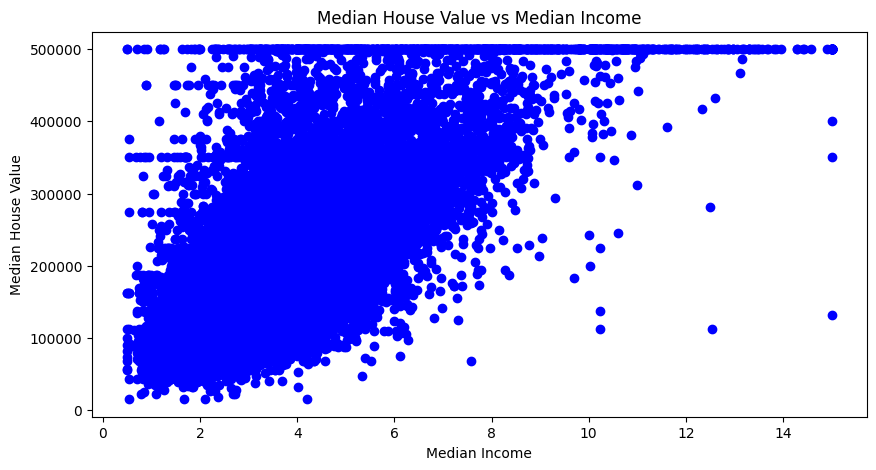

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(X_housing['Median_Income'], y_housing, color='blue')
plt.title('Median House Value vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()



4-Split The Dataset:

In [6]:

train_x, test_x, train_y, test_y = train_test_split(X_housing, y_housing, test_size=0.15, random_state=42) # split the data into training and testing sets


5-Appling K-Fold Cross-Validation:

In [7]:
# Step 2: Apply K-Fold with n_splits=6 on 85% Training Data so that training set ~70% and validtaion set ~15%
kf = KFold(n_splits=6, shuffle=True, random_state=42)

6-Standardization:

In [8]:
scaler = StandardScaler() # create a StandardScaler object

7-Store results:

In [9]:
results = {"Linear Regression": {"Mean Square Error": [], "Mean Absolute Error": []},
           "Lasso Regression": {"Mean Square Error": [], "Mean Absolute Error": []},
           "Ridge Regression": {"Mean Square Error": [], "Mean Absolute Error": []}}

8- Linear Regression

In [10]:
def linear_regression(X_train, y_train, X_val, y_val):
    linear = LinearRegression() # create a LinearRegression object
    linear.fit(X_train, y_train) # fit the model
    y_pred_linear = linear.predict(X_val) # make predictions
    mse = mean_squared_error(y_val, y_pred_linear) # calculate the mean squared error
    mae = mean_absolute_error(y_val, y_pred_linear) # calculate the mean absolute error
    y_pred_linear = linear.predict(X_train)[:10]
    return y_pred_linear ,mse, mae

9-Lasso Regression:

In [11]:
def lasso_regression(X_train, y_train, X_val, y_val, alpha=0.1):
    lasso = Lasso(alpha=alpha, max_iter=10000) # create a Lasso object with the specified alpha and max_iter
    lasso.fit(X_train, y_train) 
    y_pred_lasso = lasso.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_lasso) 
    mae = mean_absolute_error(y_val, y_pred_lasso)
    y_pred_lasso = lasso.predict(X_train)[:10]
    return y_pred_lasso ,mse, mae

10-Ridge Regression:

In [12]:
def ridge_regression(X_train, y_train, X_val, y_val, alpha=0.1):
    ridge = Ridge(alpha=alpha) # create a Ridge object with the specified alpha
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_ridge)
    mae = mean_absolute_error(y_val, y_pred_ridge)
    y_pred_ridge = ridge.predict(X_train)[:10]
    return y_pred_ridge ,mse, mae


11- Plotting the Results:

In [13]:
def plot_results(results):
    for model in results:
        mse = results[model]["Mean Square Error"] # get the mean squared error
        mae = results[model]["Mean Absolute Error"] # get the mean absolute error
        # Plotting Mean Square Error
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(mse, label='MSE')
        plt.title(f'{model} - Mean Square Error')
        plt.xlabel('Fold')
        plt.ylabel('MSE')
        plt.legend()
        plt.grid(True) 
        
        # Plotting Mean Absolute Error
        plt.subplot(1, 2, 2)
        plt.plot(mae, label='MAE')
        plt.title(f'{model} - Mean Absolute Error')
        plt.xlabel('Fold')
        plt.ylabel('MAE')
        plt.legend()
        plt.grid(True)  
        
        # Display the plots
        plt.tight_layout()
        plt.show()


12-  K-Fold Cross-Validation on Training Set:

In [14]:

for train_index, val_index in kf.split(train_x):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index] # get the training and validation sets and scale the data
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index] 

    X_train = scaler.fit_transform(X_train) # fit and transform the training set
    X_val = scaler.transform(X_val)

    # Linear Regression
    y_pred_linear, mse, mae = linear_regression(X_train, y_train, X_val, y_val)
    results["Linear Regression"]["Mean Square Error"].append(mse) # append the mean squared error to the results dictionary
    results["Linear Regression"]["Mean Absolute Error"].append(mae)

    # Lasso Regression
    y_pred_lasso,mse, mae = lasso_regression(X_train, y_train, X_val, y_val)
    results["Lasso Regression"]["Mean Square Error"].append(mse)
    results["Lasso Regression"]["Mean Absolute Error"].append(mae)

    # Ridge Regression
    y_pred_ridge, mse, mae = ridge_regression(X_train, y_train, X_val, y_val)
    results["Ridge Regression"]["Mean Square Error"].append(mse)
    results["Ridge Regression"]["Mean Absolute Error"].append(mae)

    # Print Predicted Median House Values for Training Set
    print("\nPredicted Median House Values (Training Set):")
    print("Linear Regression:", y_pred_linear)
    print("Lasso Regression:", y_pred_lasso)
    print("Ridge Regression:", y_pred_ridge)



Predicted Median House Values (Training Set):
Linear Regression: [104645.39391834 232586.01994387 163983.73109374 151045.20286247
 180768.21401298 271605.44546516 237972.1189104  210575.28839093
 154821.68687984 258680.70623845]
Lasso Regression: [104642.63499051 232586.09006907 163991.51735802 151046.51473144
 180766.63431597 271605.70436294 237968.11392512 210569.28704189
 154821.94794717 258686.23516413]
Ridge Regression: [104638.9672777  232587.81576643 164012.34496609 151051.91420447
 180764.31442955 271607.60731267 237946.11256244 210556.6736146
 154822.7813969  258702.10751713]

Predicted Median House Values (Training Set):
Linear Regression: [233875.69104913 163372.11338791 142082.10646333 148876.41767801
 323490.62325627 182061.7581456  272839.41889865 166827.21261602
 240137.56112176 211465.0937831 ]
Lasso Regression: [233875.73718551 163379.76281417 142086.71295654 148877.87194862
 323494.68994353 182060.20520746 272839.60603132 166829.67358844
 240133.66398421 211459.21999

13- Displaying the MSE & MAE Results:


Linear Regression:
Average Mean Square Error: 4704039022.857062
Average Mean Absolute Error: 49777.04718315246

Lasso Regression:
Average Mean Square Error: 4704038716.527915
Average Mean Absolute Error: 49777.11975761978

Ridge Regression:
Average Mean Square Error: 4704032521.0942335
Average Mean Absolute Error: 49777.38288770586


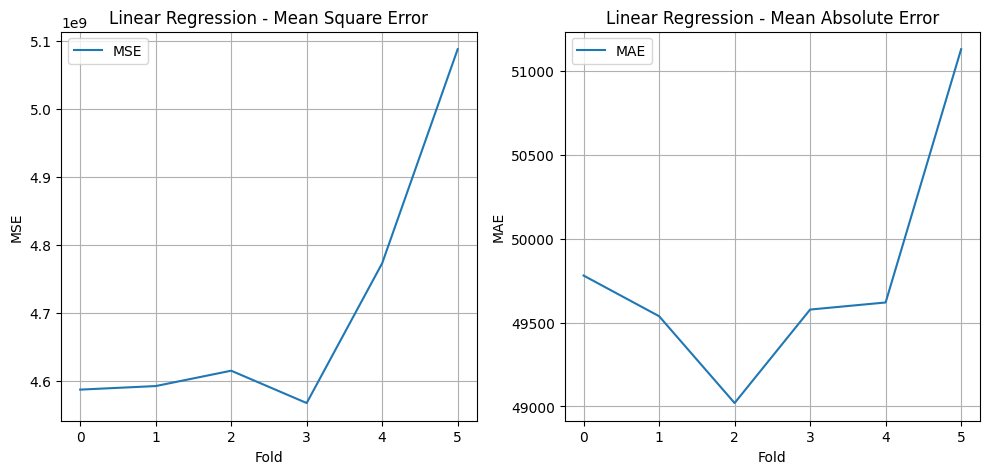

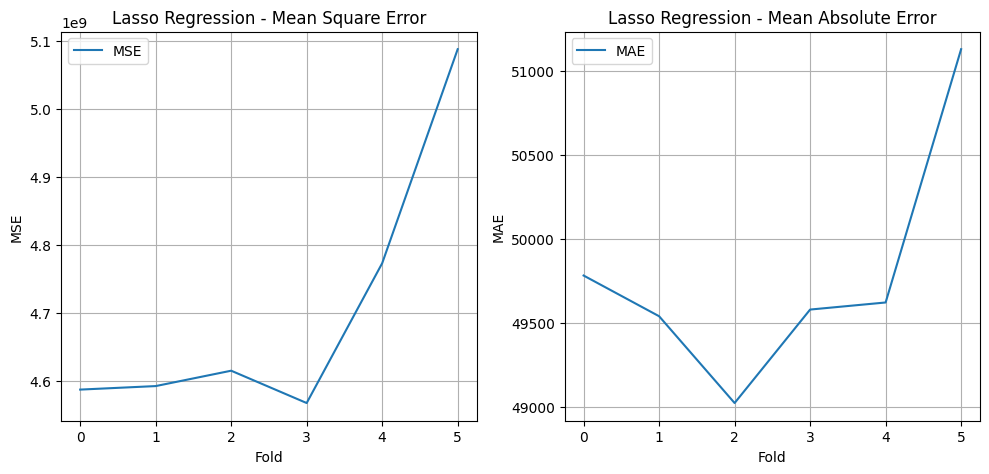

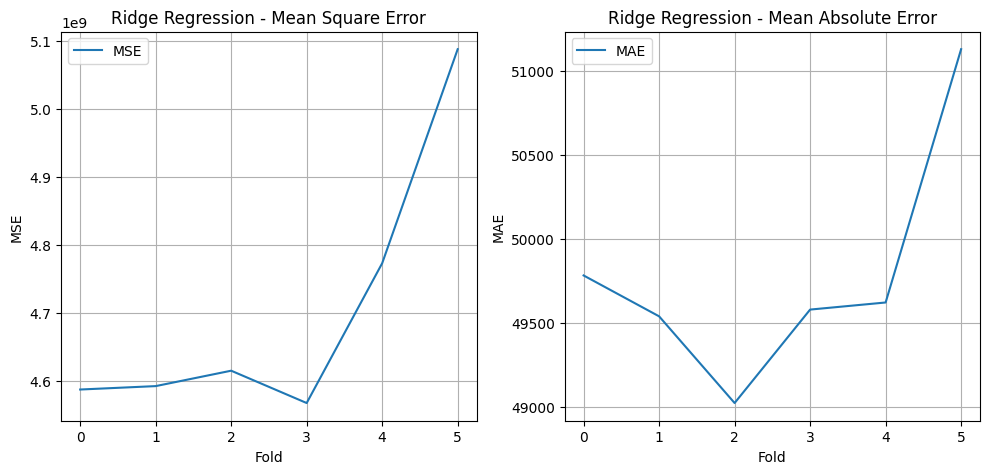

In [15]:
for name in results:
    print(f"\n{name}:")
    print(f"Average Mean Square Error: {np.mean(results[name]['Mean Square Error'])}")
    print(f"Average Mean Absolute Error: {np.mean(results[name]['Mean Absolute Error'])}")

plot_results(results)

14-Test Set Evaluation:

In [16]:
# --- FINAL TEST SET EVALUATION (After K-Fold Cross-Validation) ---
test_x = scaler.transform(test_x)  # Apply same scaling
print("\n--- Evaluating on Final 15% Test Set ---")
final_models = {}
for name, model in zip(["Linear Regression", "Lasso Regression", "Ridge Regression"],
                        [linear_regression, lasso_regression, ridge_regression]):
    y_pred_test,mse, mae = model(X_train, y_train, test_x, test_y)  # Evaluate on test set
    final_models[name] = model
    results[name]["Mean Square Error"].append(mse)
    results[name]["Mean Absolute Error"].append(mae)
    print(f"\n{name}:")
    print(f"Mean Square Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Predicted Median House Values (Testing Set): {y_pred_test[:10]}")



--- Evaluating on Final 15% Test Set ---

Linear Regression:
Mean Square Error: 4859183161.625992
Mean Absolute Error: 50727.67930424335
Predicted Median House Values (Testing Set): [102899.30567984 163322.49667099 144713.26355636 151507.07233959
 324400.40667593 179910.39997017 271089.54513053 167557.44455454
 211276.0641961  257812.35081055]

Lasso Regression:
Mean Square Error: 4859190771.953637
Mean Absolute Error: 50727.783020306735
Predicted Median House Values (Testing Set): [102896.586004   163330.21346774 144717.87327292 151508.49923088
 324404.45418937 179908.85915442 271089.77977698 167559.80452671
 211270.12141302 257817.90014543]

Ridge Regression:
Mean Square Error: 4859210931.25001
Mean Absolute Error: 50728.21469793751
Predicted Median House Values (Testing Set): [102892.4672975  163353.09259857 144721.1302067  151514.7696157
 324408.00346465 179906.35908021 271091.87168305 167566.17636688
 211256.25959394 257836.4155507 ]


15-Training Set Evaluation:

<div class="alert alert-block alert-success">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: green;">
        <h4>Linear Regression:</h4></p>
        <ul>
            <li><strong>Average Mean Square Error (MSE)</strong>: 4,704,039,022.857062</li></p>
            <li><strong>Average Mean Absolute Error (MAE)</strong>: 49,777.04718315246</li></p>
        </ul>
        <h4>Lasso Regression:</h4>
        <ul>
            <li><strong>Average Mean Square Error (MSE)</strong>: 4,704,038,716.527915</li></p>
            <li><strong>Average Mean Absolute Error (MAE)</strong>: 49,777.11975761978</li></p>
        </ul>
        <h4>Ridge Regression:</h4>
        <ul>
            <li><strong>Average Mean Square Error (MSE)</strong>: 4,704,032,521.0942335</li></p>
            <li><strong>Average Mean Absolute Error (MAE)</strong>: 49,777.38288770586</li></p>
        </ul>
    </div>
</div>

16-Test Set Evaluation:

<div class="alert alert-block alert-success">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: green;">
        <h4>Linear Regression Final Test Results:</h4>
        <ul>
            <li><strong>Test MSE</strong>: 4,859,183,161.625993</li></p>
            <li><strong>Test MAE</strong>: 50,727.679304243354</li></p>
        </ul>
        <h4>Lasso Regression Final Test Results:</h4>
        <ul>
            <li><strong>Test MSE</strong>: 4,859,190,771.953638</li></p>
            <li><strong>Test MAE</strong>: 50,727.783020306735</li></p>
        </ul>
        <h4>Ridge Regression Final Test Results:</h4>
        <ul>
            <li><strong>Test MSE</strong>: 4,859,210,931.250007</li></p>
            <li><strong>Test MAE</strong>: 50,728.21469793744</li></p>
        </ul>
      </div>
</div>


17-Comparison:

<div class="alert alert-block alert-success">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: green;">
        <ol>
            <li><strong>Mean Square Error (MSE)</strong>:</p></p>
                <ul>
                    <li>The MSE values for all three models are very close to each other, both in the training and test sets.</li></p></p></p></p>
                    <li>Ridge Regression has the lowest average MSE on the training set, indicating slightly better performance in terms of minimizing the squared errors.</li></p></p></p></p>
                    <li>On the test set, Linear Regression has a slightly lower MSE compared to Lasso and Ridge Regression, but the differences are minimal.</li></p>
                </ul>
            </li>
            <li><strong>Mean Absolute Error (MAE)</strong>:</p></p>
                <ul>
                    <li>The MAE values for all three models are also very close to each other, both in the training and test sets.</li></p></p>
                    <li>Linear Regression has the lowest average MAE on the training set, indicating slightly better performance in terms of minimizing the absolute errors.</li></p></p>
                    <li>On the test set, Linear Regression again has a slightly lower MAE compared to Lasso and Ridge Regression, but the differences are minimal.</li></p>
                </ul>
            </li>
                <li><strong>Model Performance</strong>:</p></p>
                <ul>
                    <li>All three models (Linear, Lasso, and Ridge Regression) perform similarly on this dataset.</li></p></p></p>
                    <li>The differences in MSE and MAE are very small, indicating that the choice of regularization (Lasso or Ridge) does not significantly impact the performance for </p>this particular dataset.</li></p></p></p>
                </ul>
            </li>
            <li><strong>Regularization Impact</strong>:</p></p>
                <ul>
                    <li>Lasso Regression performs feature selection by shrinking some coefficients to zero, which can be useful if there are many irrelevant features.</p></p></p> However, in this case, it does not provide a significant advantage over Linear Regression.</li></p></p></p>
                    <li>Ridge Regression helps in dealing with multicollinearity by shrinking the coefficients, but again, it does not provide a significant advantage over</p> Linear Regression in this case.</li></p></p>
                </ul></p>
            </li>
        </ol>
      </div>
</div>


18-Conclusion:

<div class="alert alert-block alert-danger">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: maron;">
        <ul>
            <li><strong>Linear Regression</strong>: </p>Performs slightly better in terms of both MSE and MAE on the test set, but the differences are minimal.</li></p></p>
            <li><strong>Lasso Regression</strong>: </p>Performs similarly to Linear Regression, with no significant advantage in this case.</li></p></p>
            <li><strong>Ridge Regression</strong>:</p> Also performs similarly to Linear Regression, with no significant advantage in this case.</li></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p>
        </ul>
        <p></p></p></p></p></p></p><span style='color:red; font-weight:Bold;'>Overall, all three models perform similarly on this dataset, and the choice of model may depend on other factors </p>such as interpretability, computational efficiency, and the presence of irrelevant features or multicollinearity in the dataset.</span>
</div>
</div>
